In [1]:
import pandas as pd
import numpy as np
drugnumbers = [39,40,43,44]

In [3]:
full_csv = pd.read_csv("emsdata.csv")

C:\Users\vogeld2\AppData\Local\Temp\ipykernel_11448\1906546336.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  full_csv = pd.read_csv("emsdata.csv")


In [12]:
# print(full_csv.dtypes)
drug_csv = full_csv[full_csv["initial_call_type"].isin(drugnumbers) | full_csv["final_call_type"].isin(drugnumbers)] 

In [15]:
drug_csv.shape

(739819, 32)

In [2]:

drug_csv = pd.read_csv("drug_related_ems.csv")



C:\Users\vogeld2\AppData\Local\Temp\ipykernel_2832\2924207596.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_csv = pd.read_csv("drug_related_ems.csv")


In [4]:
drug_csv.drop(columns=drug_csv.columns[0], 
        axis=1, 
        inplace=True)
cols = drug_csv.columns
print(cols)

Index(['cad_incident_id', 'initial_severity_level_code',
       'final_severity_level_code', 'valid_dispatch_rspns_time_indc',
       'dispatch_response_seconds_qy', 'valid_incident_rspns_time_indc',
       'incident_response_seconds_qy', 'incident_travel_tm_seconds_qy',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator', 'incident_dt',
       'first_assign_dt', 'first_act_dt', 'first_on_scene_dt',
       'first_to_hosp_dt', 'first_hosp_arrival_dt', 'incident_close_dt',
       'incident_year', 'initial_call_type', 'final_call_type'],
      dtype='object')


In [6]:
drug_csv.to_pickle("drug_related.pkl")

In [ ]:
d = pd.read_pickle("drug_related.pkl")

In [15]:
drug_csv.to_csv("drug_related_ems.csv")

In [3]:
ems_np = drug_csv.to_numpy()

In [4]:
boroughs = ems_np[:,11]

In [5]:
import matplotlib.pyplot as plt

In [11]:
boroughsunique = np.unique(boroughs)

In [12]:
print(boroughsunique)

['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'RICHMOND / STATEN ISLAND'
 'UNKNOWN']


<BarContainer object of 6 artists>

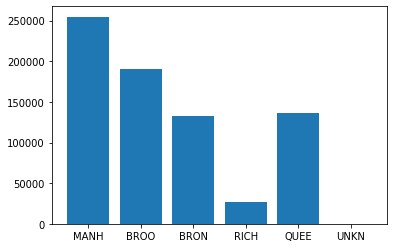

In [22]:
from collections import Counter
boroughcounts = Counter(boroughs)
# print(boroughcounts)
plt.bar(range(len(boroughcounts)), boroughcounts.values(), tick_label = [x[0:4] for x in list(boroughcounts.keys())])

Text(0.5, 1.0, 'Drug-related emergency calls per person per year')

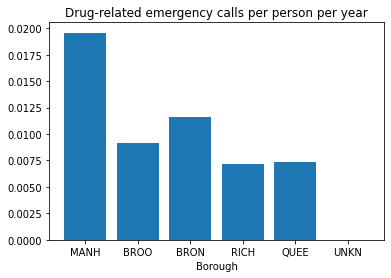

In [26]:
calls = np.asarray(list(boroughcounts.values()))
pop = np.asarray([1626159,2592149,1418733,472621,2296175,8405837])
rates = calls/pop
rates /= 8
plt.bar(range(len(boroughcounts)), rates, tick_label = [x[0:4] for x in list(boroughcounts.keys())])
plt.xlabel("Borough")
plt.title("Drug-related emergency calls per person per year")


In [44]:
ZIPCODE = [int(float(str(x).replace(",",""))) for x in ems_np[:,13] if str(x) != "nan"]
zipcounter = Counter(ZIPCODE)

In [45]:
zips = list(zipcounter.keys())
counts = list(zipcounter.values())
print(len(zips))
print(zips)

232
[10010, 11210, 10019, 10462, 10302, 10001, 10457, 11105, 10022, 10014, 10036, 10027, 10035, 10021, 10310, 10003, 10467, 11433, 11221, 10305, 10009, 10304, 11373, 10011, 10007, 10038, 10468, 10472, 11385, 10016, 11249, 10454, 11372, 11235, 10005, 11214, 11217, 11101, 10453, 10025, 10451, 10128, 10018, 10013, 11377, 10012, 11215, 10024, 11434, 11208, 11356, 11354, 11237, 10455, 11220, 11435, 10030, 10458, 10460, 11236, 10165, 11361, 11206, 10452, 11229, 11212, 10028, 11694, 11234, 10031, 11432, 11224, 11378, 11201, 11218, 10075, 11370, 10309, 10463, 10017, 10032, 10456, 11226, 10465, 11374, 11369, 11421, 10002, 10033, 11420, 11368, 11106, 11209, 10026, 10029, 10004, 11364, 10466, 10039, 11225, 11223, 11219, 10301, 10037, 11230, 11213, 11413, 10473, 11216, 11428, 11419, 10312, 11211, 11207, 11233, 11418, 10040, 11222, 11375, 11104, 11205, 11103, 11238, 10469, 11004, 10314, 11692, 10307, 11412, 11365, 11239, 10303, 11691, 10461, 10121, 11427, 10475, 11415, 11411, 10474, 11379, 11358, 1

<BarContainer object of 232 artists>

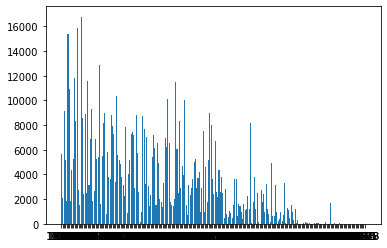

In [46]:

plt.bar(range(len(zipcounter)), counts, tick_label = zips)

In [9]:
print(ems_np.dtype.names)

None


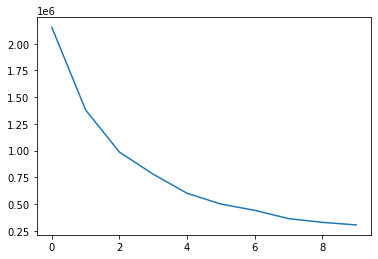

In [16]:
y = [2153709.000000756, 1379982.7839035469, 985498.0123193634, 778910.3777266023, 600300.8927582309,
     499391.366767894, 440709.1644858943, 363367.468635155, 328133.91385117185, 304231.1723485692]
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x, y)
